<a href="https://colab.research.google.com/github/xarvel/DataScience/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN (K-Nearest Neighbor)

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

**Iris Dataset**

* Iris is a genus of species of flowering plants with showy flowers.
* The iris species here studied, setosa, versicolor and virginica share a similar color: dark violet/blue.
* A way to distinguish visually the species among them is through their petals and sepals dimensions (lenght and width).

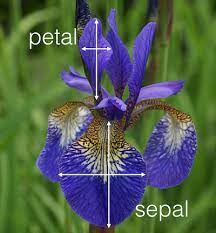

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
x, y = iris.data, iris.target

In [26]:
df = pd.DataFrame(data=np.c_[iris['data']], columns= iris['feature_names'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
pd.value_counts(df.species)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


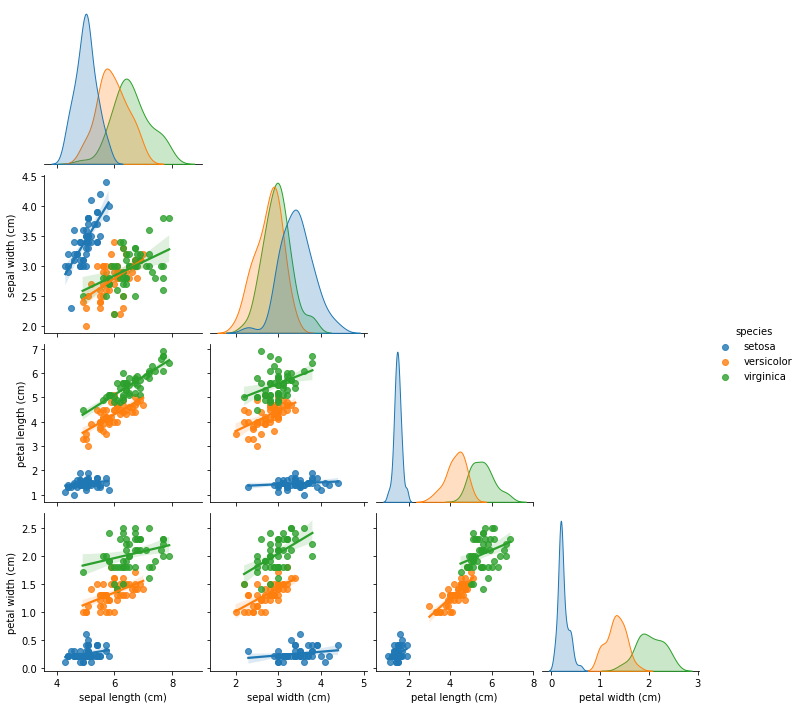

In [29]:
sns.pairplot(df, hue="species", corner=True, kind='reg')

In [30]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(x, y, 
                                                  test_size=0.2,
                                                  random_state=123)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)                           

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_X, train_y)


KNeighborsClassifier()

In [33]:
classifier.score(test_X,test_y)

0.9

In [34]:
pred_y = classifier.predict(test_X)

from sklearn import metrics

print("Manual Accuracy:", np.sum(pred_y == test_y) / float(len(test_y)))
print("Metrics score: ", metrics.accuracy_score(test_y, pred_y) )
print("Classifier score: ", classifier.score(test_X, test_y) )

Manual Accuracy: 0.9
Metrics score:  0.9
Classifier score:  0.9
